## Black Friday - Sales Analysis ##

Top Insights from Black Friday sales report, shared in [Kaggle](https://www.kaggle.com/mehdidag/black-friday).

With this data, I will try to answer the following questions
1. What all are the products, that have been purchased the most?
2. Which product category has been sold the maximum?
3. Men or Women, who are likely to spend more in Black Friday Sales?
4. Married or Individuals, who spends more?
5. Which age group has more interest in these type of sales?

#1 Quick Insights about the EDA

What is Exploratory Data Analysis? Exploratory analysis is done when you are searching for insights from the data using the plots. More details refer the here

In [193]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sns
%matplotlib inline


In [194]:
#load the dataset
df = pd.read_csv("./Data/BlackFriday.csv")

In [195]:
df.shape

(537577, 12)

**This data set consist of 537577 rows(observations) with 12 columns (features)**

In [196]:
#Description of the data sets
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [197]:
#View first few records
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [198]:
#view last few records
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [199]:
#Look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


**We are able to find three different datatypes as**
- 2 columns with float64
- 5 columns with int64
- 5 columns with object 

*Gender* & *City_Category* are categorical (Nominal) variables,
*Age* column has values in grouped manner.
we need to preprocess them, which we can see in the later section



> *#2 Quick Insights on the* **data types** 
>
> The Data types are classified into two as **Quantitative** and **Categorical**
> **Quantitative** data takes on numeric values that allow us to perform mathematical operations (like the number of dogs).
> **Categorical** are used to label a group or set of items (like dog breeds - Collies, Labs, Poodles, etc.).
>
> Categorical Ordinal vs. Categorical Nominal
> We can divide **categorical** data further into two types: **Ordinal** and **Nominal**.
> **Categorical Ordinal** data take on a ranked ordering (like a ranked interaction on a scale from Very Poor to Very Good with the dogs).
> **Categorical Nominal** data do not have an order or ranking (like the breeds of the dog).
>
> **Continuous** vs. **Discrete**
> We can think of **quantitative** data as being either **continuous** or **discrete**.
>Continuous data can be split into smaller and smaller units, and still a smaller unit exists. An example of this is the age of the dog - we can measure the units of the age in years, months, days, hours, seconds, but there are still smaller units that could be associated with the age.
>Discrete data only takes on countable values. The number of dogs we interact with is an example of a discrete data type.
>
>More details refer [wiki](https://en.wikipedia.org/wiki/Level_of_measurement) and a very good [Medium](https://towardsdatascience.com/data-types-in-statistics-347e152e8bee) post.




## Data Analysis##

<AxesSubplot:>

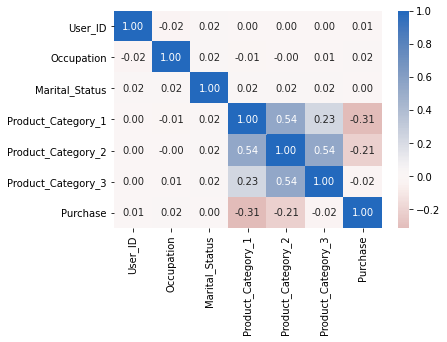

In [200]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

Product_Category_1, Product_Category_2 & Product_Category_3 correlation vale >.5 which is moderate. 

In [201]:
#Insights on NaN values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

we are able to see more null values in Product_Category_2 and Product_Category_3, let us check the value counts for each category.

In [202]:
#Let us check the values counts on product category trend
df["Product_Category_1"].value_counts()

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

In [203]:
df["Product_Category_2"].value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [204]:
df["Product_Category_3"].value_counts()

16.0    32148
15.0    27611
14.0    18121
17.0    16449
5.0     16380
8.0     12384
9.0     11414
12.0     9094
13.0     5385
6.0      4818
18.0     4563
4.0      1840
11.0     1773
10.0     1698
3.0       600
Name: Product_Category_3, dtype: int64

In [205]:
# Deep copy the original data frame, so that changes made in copy will not impact the original version
df_copy = df.copy()


In [206]:
print ("Shape of Original df:{}".format(df.shape))
print ("Shape of Copy df_copy:{}".format(df_copy.shape))

Shape of Original df:(537577, 12)
Shape of Copy df_copy:(537577, 12)


Now let us drop the Nan values in the copied dataframe to see how much data loss we have

In [207]:
df_copy.dropna(inplace=True)

In [208]:
print ("Shape of Original df:{}".format(df.shape))
print ("Shape of Copy df_copy:{}".format(df_copy.shape))

Shape of Original df:(537577, 12)
Shape of Copy df_copy:(164278, 12)


In [209]:
df_copy[["Product_ID","Product_Category_1","Product_Category_2","Product_Category_3"]].head()

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
1,P00248942,1,6.0,14.0
6,P00184942,1,8.0,17.0
13,P00145042,1,2.0,5.0
14,P00231342,5,8.0,14.0
16,P0096642,2,3.0,4.0


In [210]:
print("Shape of the original data set : {}".format(df.shape))
print("Shape of the NaN removed data set : {}".format(df_copy.shape))

Shape of the original data set : (537577, 12)
Shape of the NaN removed data set : (164278, 12)


In [211]:
#df_copy.dropna().shape[0]/df_copy.shape[0]
print ("Propotion of missing values in df :{0:.2f}".format((df.shape[0] - df_copy.shape[0])/df.shape[0]))


Propotion of missing values in df :0.69


**Removing the NaN values is resulting in loss of 70% data in the data set**. This results in *bias-ed* model causing the model to be underfit.

The available alternate approaches are imputing the missing values with mean, mode or fill with 0. 
since the Product_Catgeory_2 & Product_Catgeory_3 coulmns are interlinked with values present in Product_Catgeory_1, hence imputing with mean/mode is not a good strategy, hence we will fill the Nan values with 0.

In [ ]:
#Fill na with Zero
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

There is no NaN values in the dataset, which is ready for further analysis now !!!

## Data Analysis ## 

Lets us get the insights for our questions from now ! 
Let us create few function to make our life simple. 

In [ ]:
#Let us create a function to plot this
def count_plot(dataframe, column_name, title =None, hue = None):
    '''
    Function to plot seaborn count plot
    Input: Dataframe name that has to be plotted, column_name that has to be plotted, title for the graph
    Output: Plot the data as a count plot
    '''
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)
    pass


In [ ]:
#let us create an quick & simple bar plot based on pandos plot method
def simple_bar_plot(data, title = None):
    '''
    A simple bar plot based on pandas plot method
    Input: data to be plotted and title for the plot
    Output: the plotled graph
    '''
    data.plot(kind="bar", title=title)
    pass

In [ ]:
#Let us create class handler to get the legend displayed in the plot
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        '''
        Function to display legend for a plot
        Input: legend, tuple string, placement of x and y descent, width and hight, font for the legend
        Output: retuns the text for legend        
        '''
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


**1. What all are the products, that have been purchased the most?**

In [ ]:
#top 10 poducts sold
df["Product_ID"].value_counts(sort=True)[:10]

In [ ]:
#plotting the top 1- products sold
simple_bar_plot(df["Product_ID"].value_counts(sort=True)[:10], title = "Top 10 products sold")

As we can see above the top 10 products are sold more than 1200 in quantity, we dont have the products description in the data set to get more details of the product. But let us see what all product category that interested the people.

**2. Which product category has been sold the maximum?**

In [ ]:
#plotting the product category
simple_bar_plot(df["Product_Category_1"].value_counts(sort=True)[:10], 
                title = "Top 10 Product Category of people interested")

The Product categories 5, 1 & 8 are sold more than 100K. In other hand the categories 11, 2, 6 & 3 have sold upto 20K. 
we can see a huge gap between the top 3 and rest of the categories. We don't have descriptions of the categories to nail down further. It would have been better if we had description of these categories to understand interest of the people. 

**3. Men or Women, who are likely to spend more in Black Friday Sales?**


In [ ]:
#Check who purchase more
count_plot(df,"Gender","Men or Women spent more ?","Gender")

Hmmmm !!! bit disappointed as my guess was Women !!
The plot show that men spent a lot in the black friday sales. But it might be in other way, as women purchased lot and made their spouse pay the bills. 
Let us deep dive more to understand on marital status of the buyers. 

**4. Married or Individuals, who spends more?** 


In [ ]:
#Let che
count_plot(df,"Marital_Status","Marital Status of Buyers")

The Plot above is with value of 0 & 1, which doesn't make sense. Let us re plot with the same with proper legend.

In [ ]:
ax=sns.countplot(df.Marital_Status) 
#creating the mapping text for the values
handltext = ["0", "1"]
labels = ["Individual", "Married"]
#get the X axis tick labels
t = ax.get_xticklabels()
#map the x values as key and values
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
plt.title("Marital Status of the Buyers")
plt.show()


**5. Which age group has more interest in these type of sales?**

In [ ]:
#we need to look the value counts of the age column
df.Age.value_counts()


In [ ]:
#sns.countplot(df['Age'])
count_plot(df,"Age","Age Group of Buyers")

The Majority of users are from age group of 26-35
Further, I could also check among the age groups, which gender was a majority by adding a hue. And as seen below, more males spent in the sale than females.

In [ ]:
count_plot(df,"Age","Age Group vs Marital Status", "Gender")

One Lastthing, let us check Age group vs Marital status of indvidual along with their Gender. Like Grouping the buyers in age group, also I need to see either it is Male or Female and interested see their marital status. 

To achieve this we need to create a new combined feature, combining the Gender & Marital Status. later we can compare that with Age group. 

In [ ]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())

In [ ]:
#
count_plot(df,"Age","Age vs Gender vs Marital Status", "combined_G_M")

As we see above, there are no bars for the married in the 0-17 range which makes sense. 
And then if we look at the 46 and above groups, females are very less. But on the other hand, married males paying in range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.